In [66]:
import os
import sys
import pandas as pd
import yaml 
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import statsmodels.api as sm
import numpy as np
from itertools import product
import subprocess

with open("../../config.yaml.local", "r") as f:
    LOCAL_CONFIG = yaml.safe_load(f)
#with open("../../config.yaml", "r") as f:
#    CONFIG = yaml.safe_load(f)
sys.path.append("../python")

import globals
import data_tools as dt

LOCAL_PATH = LOCAL_CONFIG["LOCAL_PATH"]
RAW_DATA_PATH = LOCAL_CONFIG["RAW_DATA_PATH"]
DATA_PATH = LOCAL_CONFIG["DATA_PATH"]
R_PATH = LOCAL_CONFIG["R_PATH"]

RUN_R_SCRIPTS = False


In [67]:
zaps = dt.get_zaps()
prices = dt.get_price_daily()
zaps['week'] = dt.as_week(zaps['zap_time'])
prices['week'] = dt.as_week(prices['timeOpen'])

c:\Users\edwar\projects\sn-research\src\notebooks\../python\data_tools.py:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.dt.to_period('W-SAT').dt.start_time
c:\Users\edwar\projects\sn-research\src\notebooks\../python\data_tools.py:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.dt.to_period('W-SAT').dt.start_time


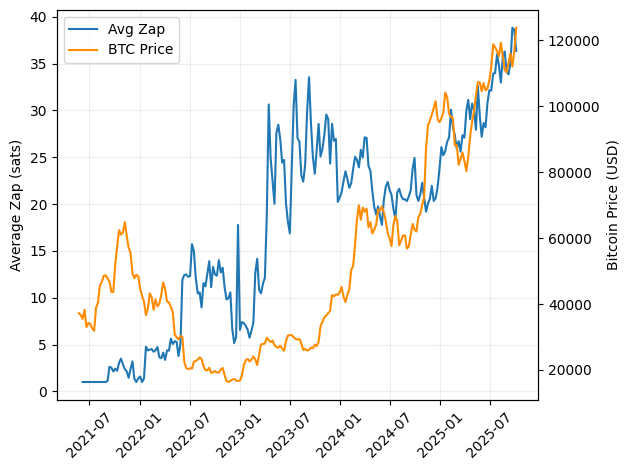

In [68]:
# drop outliers
zaps['cutoff'] = zaps.groupby('week')['sats'].transform(lambda x: x.quantile(0.95))
tempdf = zaps[zaps['sats'] <= zaps['cutoff']]

zw = tempdf.groupby('week').agg(
    avg_zap = ('sats', 'mean'),
).reset_index()

pw = prices.groupby('week').agg(
    avg_price = ('price_mid', 'mean')
).reset_index()

fig, ax1 = plt.subplots()
fig.figsize = (6, 4)

ax1.plot(zw['week'], zw['avg_zap'], color='tab:blue', label='Avg Zap')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Average Zap (sats)')

ax2 = ax1.twinx()
ax2.plot(pw['week'], pw['avg_price'], color='darkorange', label='BTC Price')
ax2.set_ylabel('Bitcoin Price (USD)')

ax1.grid(alpha=0.2)
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

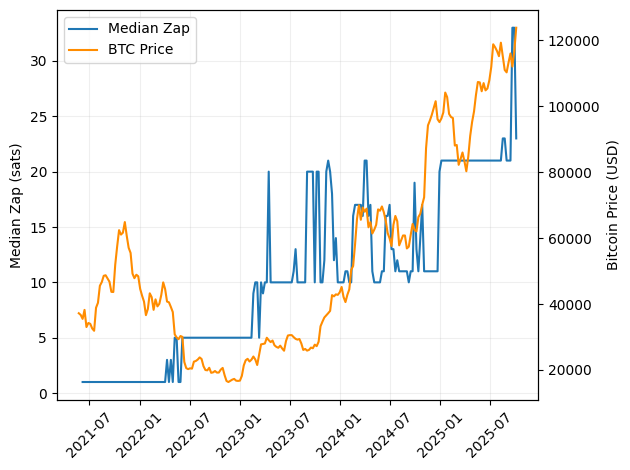

In [69]:
# drop outliers

zw = zaps.groupby('week').agg(
    med_zap = ('sats', 'median'),
).reset_index()

pw = prices.groupby('week').agg(
    avg_price = ('price_mid', 'mean')
).reset_index()

fig, ax1 = plt.subplots()
fig.figsize = (6, 4)

ax1.plot(zw['week'], zw['med_zap'], color='tab:blue', label='Median Zap')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Median Zap (sats)')

ax2 = ax1.twinx()
ax2.plot(pw['week'], pw['avg_price'], color='darkorange', label='BTC Price')
ax2.set_ylabel('Bitcoin Price (USD)')

ax1.grid(alpha=0.2)
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()